In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("data.csv")

In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [74]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [75]:
df.shape

(541909, 8)

# Exploratory Data Analysis

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Column Descriptions:

- **InvoiceNo:** It is available for each transaction.
- **StockCode:** It is basically a product code assigned to each unique product.
- **Description:** It is the name of the product.
- **Quantity:** No. of each product ordered per transaction.
- **InvoiceDate:** It includes the date and time of the order.
- **UnitPrice:** Product price per unit.
- **Country:** Country name from where the order is placed.


In [77]:
df["CustomerID"].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14351.0       1
13256.0       1
12943.0       1
17923.0       1
13747.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [78]:
#total no. of products
print(len(df["StockCode"].value_counts()))

4070


In [79]:
df["StockCode"].value_counts()

85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
            ... 
90187A         1
37477C         1
21610          1
46776b         1
DCGS0074       1
Name: StockCode, Length: 4070, dtype: int64

In [80]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [81]:
df = df.dropna(subset=["CustomerID"])
# Reset the index after dropping rows
df = df.reset_index(drop=True)

In [82]:
df.duplicated().sum()

5225

In [83]:
#remove the duplicate rows 
df.drop_duplicates(inplace=True)

In [84]:
df.shape

(401604, 8)

In [85]:
#total no. of transactions
len(df["InvoiceNo"].value_counts())

22190

**Feature Engineering**

In [86]:
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

In [87]:
# Drop rows with negative total spending
df = df[df['TotalSpending'] >0]

# Reset the index after dropping rows
df = df.reset_index(drop=True)

In [88]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [89]:
#Grouping of the data by annual spending of the each customer
annual_spending = df.groupby('CustomerID')['TotalSpending'].sum()

In [90]:
print(annual_spending)

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: TotalSpending, Length: 4338, dtype: float64


In [91]:
#making a copy of the data_frame
df_copy=df.copy()

In [92]:
df = df.merge(annual_spending, on='CustomerID', suffixes=('', '_AnnualSpending'))

In [93]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_AnnualSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,5391.21


In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.shape

(392692, 10)

In [96]:
#convert invoice date to date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [97]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_AnnualSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21


In [98]:
#Extract year from InvoiceDate to create a new feature 'Year'
df['Year'] = df['InvoiceDate'].dt.year

In [99]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Belgium', 'Netherlands',
       'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland',
       'Portugal', 'Italy', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Austria', 'Cyprus', 'Sweden',
       'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [100]:
#total unique countries
print(len(df['Country'].unique()))

37


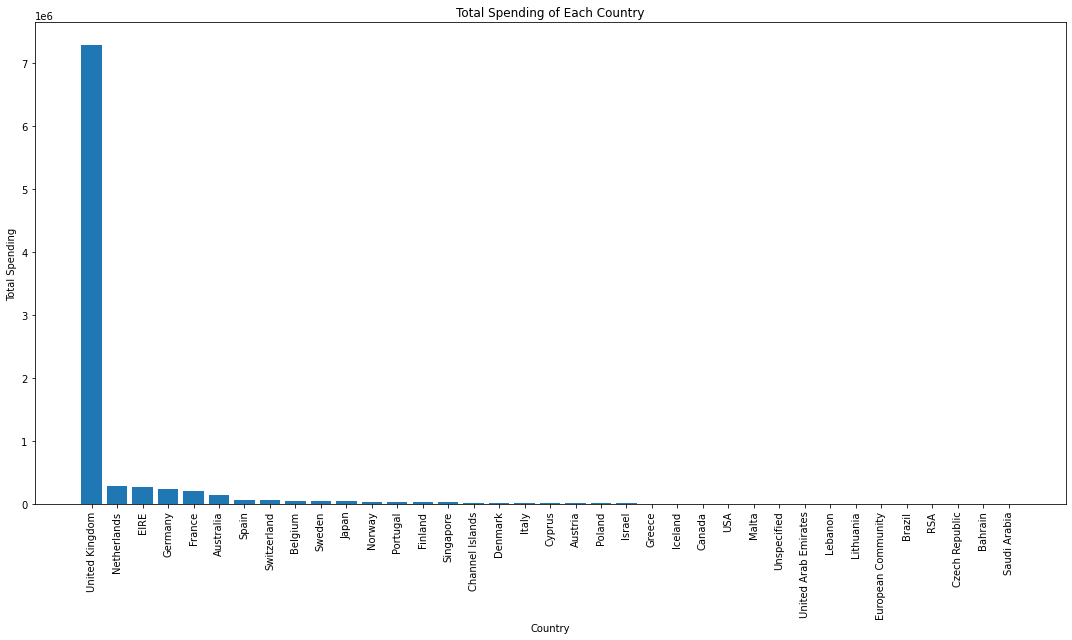

In [101]:
#plot the spent of each country
country_spending = df.groupby('Country')['TotalSpending'].sum()
country_spending = country_spending.sort_values(ascending=False)
plt.figure(figsize=(15, 9))
plt.bar(country_spending.index, country_spending.values)
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Total Spending of Each Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It can be interpreted that the maximum customers were from the UK country.

In [102]:
# Encode categorical variables (Country) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['Country'])

In [103]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_AnnualSpending,Year,Country_Encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21,2010,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21,2010,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010,35


# Predictive Model Building

In [104]:
from sklearn.model_selection import train_test_split ,  GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [105]:
X = df[['Quantity', 'UnitPrice', 'Country_Encoded', 'Year']]
y = df['TotalSpending_AnnualSpending']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
results = {}

In [108]:
# Model 1: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
results['Linear Regression'] = {'Model': linear_reg, 'MSE': mse_linear, 'MAE': mae_linear, 'R-squared': r2_linear}

In [109]:
# Model 2: Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
y_pred_dt = decision_tree_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
results['Decision Tree Regression'] = {'Model': decision_tree_reg, 'MSE': mse_dt, 'MAE': mae_dt, 'R-squared': r2_dt}

In [110]:
# Model 3: Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results['Random Forest Regression'] = {'Model': random_forest_reg, 'MSE': mse_rf, 'MAE': mae_rf, 'R-squared': r2_rf}

In [111]:
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MSE: {metrics['MSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print("**************")

Model: Linear Regression
MSE: 889199499.7326505
MAE: 13947.592566129693
R-squared: 0.11337626911575183
**************
Model: Decision Tree Regression
MSE: 191891837.12521538
MAE: 6370.801483367601
R-squared: 0.8086640212805511
**************
Model: Random Forest Regression
MSE: 179789481.6467732
MAE: 6383.374854492095
R-squared: 0.8207313195302803
**************


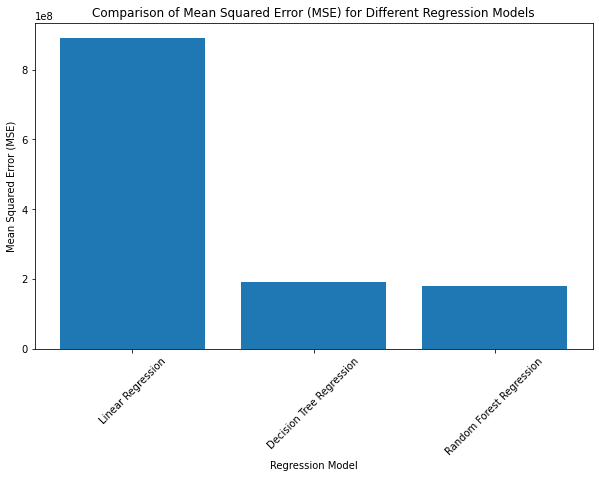

In [112]:
# Create a bar plot to compare MSE for each model
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [metric['MSE'] for metric in results.values()])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regression Models')
plt.xticks(rotation=45)
plt.show()

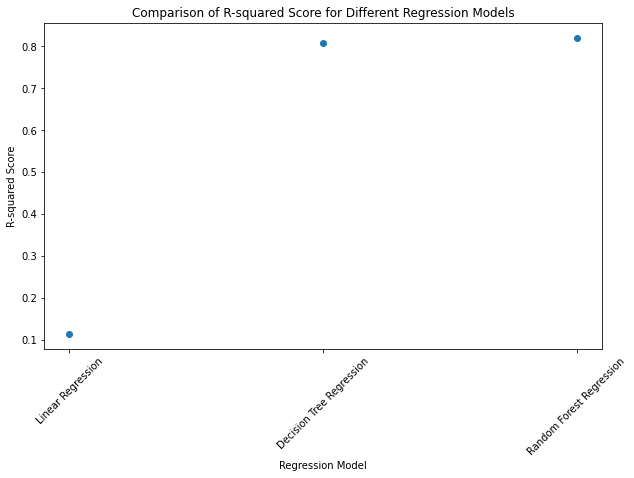

In [113]:
# Create a scatter plot to compare R-squared scores for each model
plt.figure(figsize=(10, 6))
plt.scatter(results.keys(), [metric['R-squared'] for metric in results.values()])
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Score for Different Regression Models')
plt.xticks(rotation=45)
plt.show()

# Customer Segmentation Using Clustering

In [128]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [115]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_AnnualSpending,Year,Country_Encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21,2010,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21,2010,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010,35


In [116]:
new_column_name = {'TotalSpending_AnnualSpending': 'Annual_Spending'}
df.rename(columns=new_column_name, inplace=True)

In [117]:
# Get the most recent date from the 'InvoiceDate' column
most_recent_date = df['InvoiceDate'].max()

# Calculate Recency based on the most recent date
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSpending': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpending': 'MonetaryValue'
}, inplace=True)


In [118]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


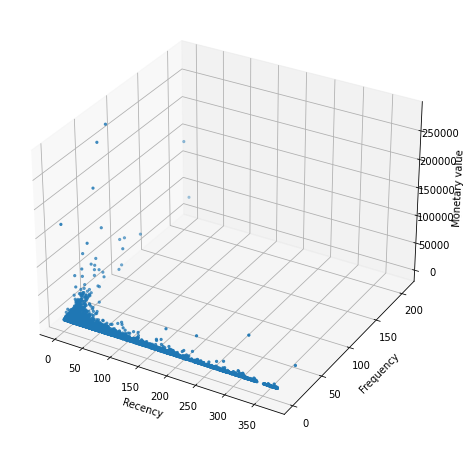

In [119]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [120]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [121]:
inertia_values = []
K_range = range(1, 11)  # Trying k values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

c:\users\nazim\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\nazim\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\nazim\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\nazim\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

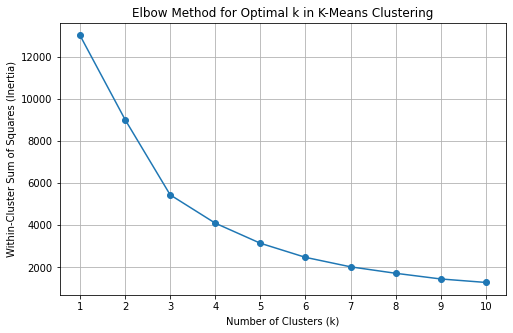

In [122]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k in K-Means Clustering')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [133]:
# Apply K-Means clustering to create clusters based on RFM metrics
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

c:\users\nazim\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:

print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering:
3    3052
0    1062
1     211
2      13
Name: KMeans_Cluster, dtype: int64


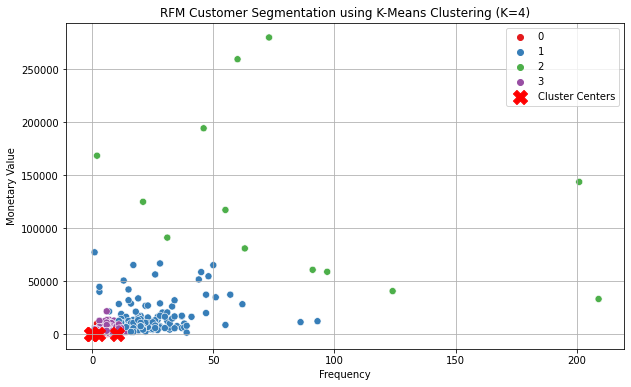

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Frequency', y='MonetaryValue', hue='Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (K=4)')
plt.legend()
plt.grid(True)
plt.show()

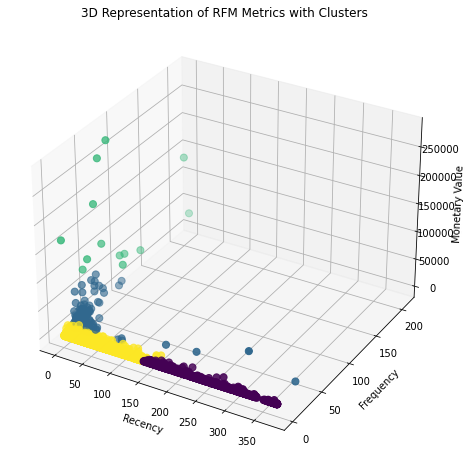

In [139]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [129]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [137]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
1    3042
2    1134
3     147
0      15
Name: Agg_Cluster, dtype: int64


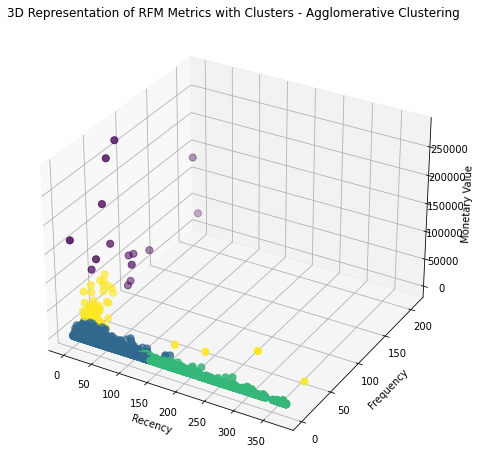

In [142]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters - Agglomerative Clustering')
plt.show()

# Interpretations

**High-Recency, Low-Frequency, Low-Monetary**

- Customers in this segment do not frequently make purchases, as seen by their high Recency value.
- They also have low Frequency, which means that they don't buy things too often.

- Additionally, their MonetaryValue is low, indicating that they consume less than other categories.
- These individuals can be potential churned or inactive consumers in need of re-engagement tactics.

**Low-Recency, Low-Frequency, Low-Monetary**

- This segment's customers have low Recency, which means they have recently made purchases.
- They do, however, have low Frequency and low Monetary Value, indicating that they spend little money and make few purchases.
- This group may be made up of clients who have recently made purchases but have not shown a high level of involvement or loyalty. For them to spend more money and make purchases more frequently, they might need specific incentives or offers.

**High-Recency, High-Frequency, High-Monetary**

- This segment's customers have high Recency, which indicates that their purchases were recent.
- Additionally, they have high Frequency, which indicates that they shop frequently.
- Furthermore, their MonetaryValue is high, showing that they spend a lot more than other groups do.
- This group is an accurate representation of the best clients, who are also the most lucrative for the company. Through  individualised offers and loyalty programmes, they should be rewarded and kept around.

**Low-Recency, High-Frequency, High-Monetary**
- This segment's customers have low Recency, which means they have recently made purchases.
- They often make purchases as evidenced by their high frequency.
- Additionally, their MonetaryValue is high, indicating they have large expenditures.
- This group is made up of devoted clients who are active buyers and a major source of income for the company. They will -probably respond favourably to loyalty incentives and tailored recommendations.
